In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import os
data = pd.read_csv("data.csv")
data.head()

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data, data['MEDV'], test_size=0.2)
print(X_train.shape) 
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(404, 14)
(404,)
(102, 14)
(102,)


In [19]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)


array([ 5.6, 50. ,  8.4, 20.4, 17.8, 13.3, 15. , 22.9, 13.3, 19.3, 23.8,
       27.9, 22.9,  6.3, 29.6, 14.9, 23.7, 20. , 22.8, 29.8])

In [26]:
predictions[0:20]

array([ 5.6, 50. ,  8.4, 20.4, 17.8, 13.3, 15. , 22.9, 13.3, 19.3, 23.8,
       27.9, 22.9,  6.3, 29.6, 14.9, 23.7, 20. , 22.8, 29.8])

In [20]:
y_test[0:20]

400     5.6
267    50.0
438     8.4
107    20.4
356    17.8
138    13.3
410    15.0
350    22.9
475    13.3
119    19.3
314    23.8
292    27.9
83     22.9
399     6.3
185    29.6
458    14.9
243    23.7
209    20.0
111    22.8
188    29.8
Name: MEDV, dtype: float64

In [22]:
model.score(X_test, y_test)

1.0

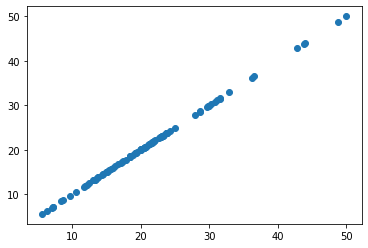

In [25]:
plt.scatter(y_test, predictions)